#### Automotive Vehicles Engine Health

In [77]:
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

from plotly.subplots import make_subplots
import plotly.colors as colors

pio.templates.default = "plotly_white"

In [78]:
df = pd.read_csv("C:/Users/abu_s/Desktop/Data/json/engine_data.csv", encoding='latin1')

In [79]:
df.head()

Engine rpm  Lub oil pressure  Fuel pressure  Coolant pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub oil temp  Coolant temp  Engine Condition  
0     84.144163     81.632187                 1  
1     77.640934     82.445724                 0  
2     77.752266     79.645777                 1  
3     74.129907     71.774629                 1  
4     78.396989     87.000225                 0

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [81]:
df.isnull().sum()

Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

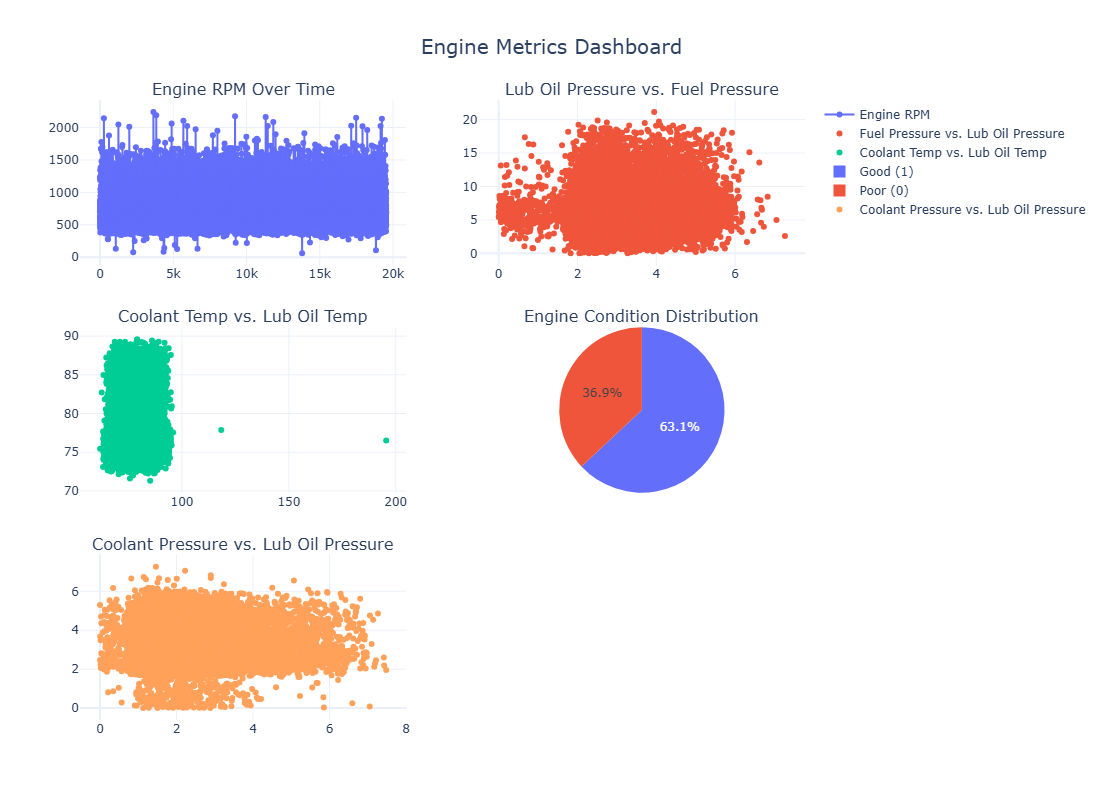

In [82]:
# Create subplots with different subplot types
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=("Engine RPM Over Time", "Lub Oil Pressure vs. Fuel Pressure", 
                    "Coolant Temp vs. Lub Oil Temp", "Engine Condition Distribution",
                    "Coolant Pressure vs. Lub Oil Pressure", ""),
    row_heights=[2.9, 2.9, 2.9],  # Adjust row heights for better layout
    vertical_spacing=0.1,
    horizontal_spacing=0.1,
    specs=[[{"type": "scatter"}, {"type": "scatter"}], 
           [{"type": "scatter"}, {"type": "pie"}], 
           [{"type": "scatter"}, None]]
)

# Update layout to ensure subplot titles are clearly visible
fig.update_layout(
    title_text="Engine Metrics Dashboard",  # Title for the whole figure
    title_x=0.5,  # Center the main title
    title_y=0.95,  # Adjust the main title vertical position
    title_font=dict(size=20),
    height=800,  # Adjust overall height for better spacing
    width=1000,  # Adjust overall width for better spacing
    showlegend=True
)

# 1. Engine RPM over Time
fig.add_trace(go.Scatter(x=df.index, y=df['Engine rpm'], mode='lines+markers', name='Engine RPM'),
              row=1, col=1)

# 2. Lub Oil Pressure vs. Fuel Pressure
fig.add_trace(go.Scatter(x=df['Lub oil pressure'], y=df['Fuel pressure'], mode='markers', name='Fuel Pressure vs. Lub Oil Pressure'),
              row=1, col=2)
# 3. Coolant Temp vs. Lub Oil Temp
fig.add_trace(go.Scatter(x=df['Coolant temp'], y=df['lub oil temp'], mode='markers', name='Coolant Temp vs. Lub Oil Temp'),
              row=2, col=1)

# 4. Engine Condition Distribution (Pie chart)
fig.add_trace(go.Pie(labels=["Good (1)", "Poor (0)"], values=df['Engine Condition'].value_counts(), name="Engine Condition Distribution"),
              row=2, col=2)
# 5. Coolant Pressure vs. Lub Oil Pressure
fig.add_trace(go.Scatter(x=df['Coolant pressure'], y=df['Lub oil pressure'], mode='markers', name='Coolant Pressure vs. Lub Oil Pressure'),
              row=3, col=1)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model = LogisticRegression(max_iter=1000)  # Default is 100

#  actual data
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Create and train the Logistic Regression model

model = LogisticRegression(solver='saga', max_iter=3000)
model.fit(X_train, y_train)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)




In [84]:

# Evaluate the model
LogisticRegy_accurac = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {LogisticRegy_accurac}")


Logistic Regression Accuracy: 0.648353523289541


In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # n_neighbors is the number of neighbors to consider
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
K_NN_accuracy = accuracy_score(y_test, y_pred)
(f"Accuracy: {K_NN_accuracy}")


'Accuracy: 0.6162770858215322'

In [86]:
from sklearn.svm import SVC

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm = SVC(kernel='linear', C=1.0)  # 'linear', 'rbf', 'poly', etc. can be used as kernels
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
SVC_accuracy = accuracy_score(y_test, y_pred)
(f"Accuracy: {SVC_accuracy}")


'Accuracy: 0.646476710458966'

In [90]:
from sklearn.svm import SVC

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm = SVC(kernel='linear', C=1.0)  # 'linear', 'rbf', 'poly', etc. can be used as kernels
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
Ksvm_accuracy = accuracy_score(y_test, y_pred)
(f"Accuracy: {Ksvm_accuracy}")


'Accuracy: 0.646476710458966'

In [91]:
from sklearn.naive_bayes import GaussianNB


# Scale the data (optional for Naive Bayes, but often useful for comparison)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)

# Make predictions
y_pred = naive_bayes.predict(X_test_scaled)

# Evaluate the model
naiveb_accuracy = accuracy_score(y_test, y_pred)
(f"Accuracy: {naiveb_accuracy}")


'Accuracy: 0.6452823750213275'

In [92]:
from sklearn.tree import DecisionTreeClassifier


# Create and train the Decision Tree model
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)  # 'entropy' can also be used for criterion
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Evaluate the model
DecisionTree_accuracy = accuracy_score(y_test, y_pred)
(f"Accuracy: {DecisionTree_accuracy}")


'Accuracy: 0.585565603139396'

In [93]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, random_state=42)  # n_estimators is the number of trees
random_forest.fit(X_train, y_train)

# Make predictions
y_pred = random_forest.predict(X_test)

# Evaluate the model
RDF_accuracy = accuracy_score(y_test, y_pred)
(f"Accuracy: {RDF_accuracy}")


'Accuracy: 0.646306091110732'

In [97]:
Results = LogisticRegy_accurac, K_NN_accuracy, SVC_accuracy, Ksvm_accuracy , naiveb_accuracy, DecisionTree_accuracy, RDF_accuracy, 

In [98]:
print(Results ) 

(0.648353523289541, 0.6162770858215322, 0.646476710458966, 0.646476710458966, 0.6452823750213275, 0.585565603139396, 0.646306091110732)


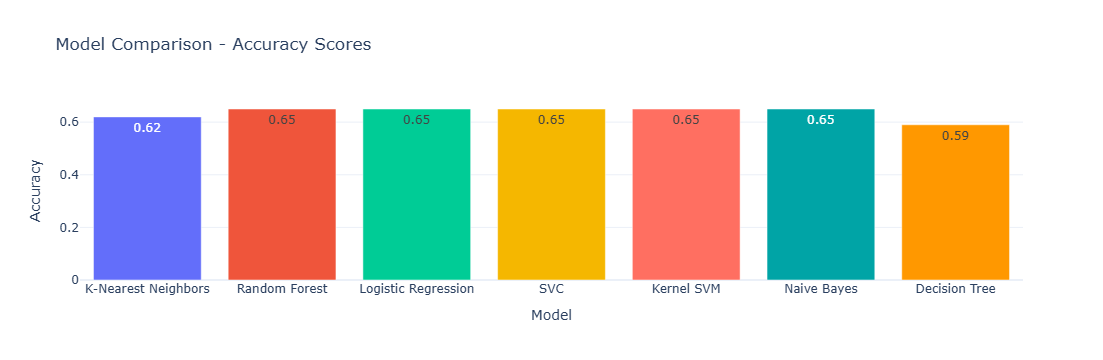

In [104]:
import plotly.graph_objects as go

# Replace these with your actual accuracy values
LogisticRegy_accurac = LogisticRegy_accurac  # Logistic Regression accuracy
K_NN = K_NN_accuracy   # KNN accuracy
SVC_accuracy = SVC_accuracy  # Example SVC accuracy
Ksvm_accuracy = Ksvm_accuracy  # Example Kernel SVM accuracy
naiveb_accuracy = naiveb_accuracy  # Example Naive Bayes accuracy
DecisionTree_accuracy = DecisionTree_accuracy  # Example Decision Tree accuracy
RDF = RDF_accuracy  # Random Forest accuracy

# Round the accuracy values to 2 decimal places
accuracies = [round(K_NN, 2), round(RDF, 2), round(LogisticRegy_accurac, 2),
              round(SVC_accuracy, 2), round(Ksvm_accuracy, 2), round(naiveb_accuracy, 2),
              round(DecisionTree_accuracy, 2)]



# Create a bar chart
fig = go.Figure(data=[go.Bar(
    x=["K-Nearest Neighbors", "Random Forest", "Logistic Regression", 
       "SVC", "Kernel SVM", "Naive Bayes", "Decision Tree"],  # Model names
    y=accuracies,  # Rounded accuracy scores
    text=accuracies,  # Display values on bars
    textposition='auto',  # Automatically position the text on bars
    marker=dict(color=['#636EFA', '#EF553B', '#00CC96', '#F5B700', '#FF6F61', '#00A4A6', '#FF9800'])  # Color of bars
)])

# Update layout with title and labels
fig.update_layout(
    title="Model Comparison - Accuracy Scores",
    xaxis_title="Model",
    yaxis_title="Accuracy",
    template="plotly_white"
)

# Show the plot
fig.show()

